In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [43]:
# reading dataset downloaded from Kegal
dataset = pd.read_csv('Housing.csv')

In [44]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
# Splitting dependent feature
x = dataset.drop(['price'], axis=1)

In [46]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
y = dataset['price']

In [48]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [49]:
#checking if any NaN is there
x.isna().any()

area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [81]:
cat_cols = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea', 'furnishingstatus'
]

In [89]:
ohe = OneHotEncoder(drop='first')
cat_col_encoded = ohe.fit_transform(x[cat_cols])

In [94]:
cat_col_encoded.toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(545, 8))

In [96]:
x.shape

(545, 12)

In [99]:
cat_col_df = pd.DataFrame(cat_col_encoded.toarray(), columns=ohe.get_feature_names_out())

In [100]:
cat_col_df.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [102]:
x_removed_cat_col=x[['bedrooms','bathrooms','stories' ,'parking']]

In [103]:
x_removed_cat_col.head()

,bedrooms,bathrooms,stories,parking
0,4,2,3,2
1,4,4,4,3
2,3,2,2,2
3,4,2,2,3
4,4,1,2,2


In [125]:
x_ohe_df = pd.concat([x_removed_cat_col.reset_index(drop=True) ,cat_col_df.reset_index(drop=True)], axis=1) 

In [122]:
x_ohe_df.head()

,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [126]:
scaler = StandardScaler()

In [127]:
x_transform = scalar.fit_transform(x_ohe_df) 

In [132]:
x_transform[0]

array([ 1.40341936,  1.42181174,  1.37821692,  1.51769249,  0.40562287,
       -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  1.80494113,
       -0.84488844, -0.6964292 ])

In [151]:
x_trian,x_test, y_trian,y_test = train_test_split(x_transform,y,test_size=0.2,random_state=2)

In [152]:
x_trian.shape

(436, 12)

In [154]:
x_test.shape

(109, 12)

In [158]:
y_trian

412    3430000
284    4270000
504    2653000
209    4900000
269    4375000
        ...   
299    4200000
534    2100000
493    2800000
527    2275000
168    5250000
Name: price, Length: 436, dtype: int64

In [159]:
y_test

333    3920000
84     6510000
439    3255000
396    3500000
161    5460000
        ...   
100    6230000
344    3850000
176    5250000
244    4550000
15     9100000
Name: price, Length: 109, dtype: int64

In [160]:
model = LinearRegression()

In [161]:
model.fit(x_trian,y_trian)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [162]:
y_predictions = model.predict(x_test)

In [175]:
model.score(x_test,y_test)

0.5435859756902417

In [172]:
rsq

0.5435859756902417

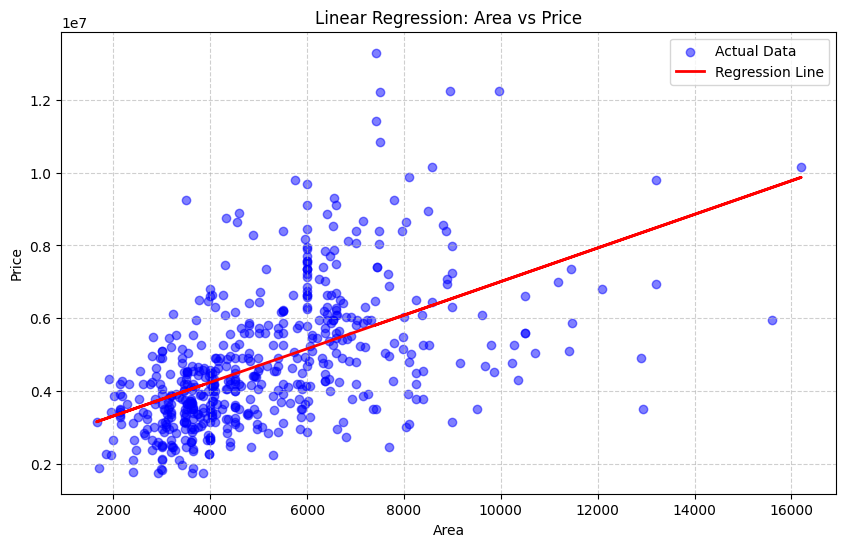

In [179]:
# We pick 'area' (column index 0 in your scaled x_ohe_df usually) 
# and the target 'price' for a 2D view
feature_name = 'area'
x_area = dataset[['area']]
y_price = dataset['price']

# Simple fit for visualization purposes
from sklearn.linear_model import LinearRegression
viz_model = LinearRegression()
viz_model.fit(x_area, y_price)
predictions = viz_model.predict(x_area)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_area, y_price, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x_area, predictions, color='red', linewidth=2, label='Regression Line')

plt.title(f'Linear Regression: {feature_name.capitalize()} vs Price')
plt.xlabel(feature_name.capitalize())
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()